# A1a
Finn Hittson - fxh157  
CSDS 464  
Due: Feburary 2nd, 2023  

## Markdown and Latex
### 1a.
The univariate normal probability distribution function (PDF), denoted $p(x|\mu,\sigma)$, is a probability distribution that only has one random variable $x$. It consistes of two parameters $\mu$ and $\sigma$ and models the normal distribution $N(\mu,\sigma)$. $\mu$ corresponds to the mean of the distribution and controls where the distribution curve is centered. $\sigma$ corresponds to the expected standard deviation from the mean and controls the shape of the distribution. The univariate normal PDF work with the square of the standard deviation, $\sigma^2$, which is the variance of the distribution. Given values for the mean and the expected standard deviation one can calculate $p(x|\mu,\sigma)$ with the following equation:

\begin{align}
p(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

### 1b.
When two probabilistic events are independent, the probability of both events occuring together becomes the product of their individual likelihoods. The same is true for probability distribution functions. For $N$ univarient normal PDF with $N$ independent random variables, the joint PDF, $p(x_{1:N}|\mu,\sigma)$ becomes the product of each random variables PDF.

\begin{align}
p(x_{1:N}|\mu,\sigma)=\prod_{k=1}^Np(x_k|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x_1-\mu)^2}{2\sigma^2}\right)\times\cdots\times\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x_N-\mu)^2}{2\sigma^2}\right)
\end{align}

Using the additivity property of exponential powers the expression can be manipulated to become the following:

\begin{align}
p(x_{1:N}|\mu,\sigma)=\frac{1}{(2\pi\sigma^2)^{N/2}}exp\left(-\frac{(x_1-\mu)^2+\cdots+(x_N-\mu)^2}{2\sigma^2}\right)=\frac{1}{(2\pi\sigma^2)^{N/2}}exp\left(-\frac{1}{2\sigma^2}\sum_{k=1}^N(x_k-\mu)^2\right)
\end{align}

## Simple Plotting and Functions

In [1]:
import math

# Returns value on normal distribution
def g(x, mu: float=0.0, sigma: float=1.0):
    return 1 / math.sqrt(2*math.pi*sigma**2) * math.exp(-(x-mu)**2 / (2*sigma**2))

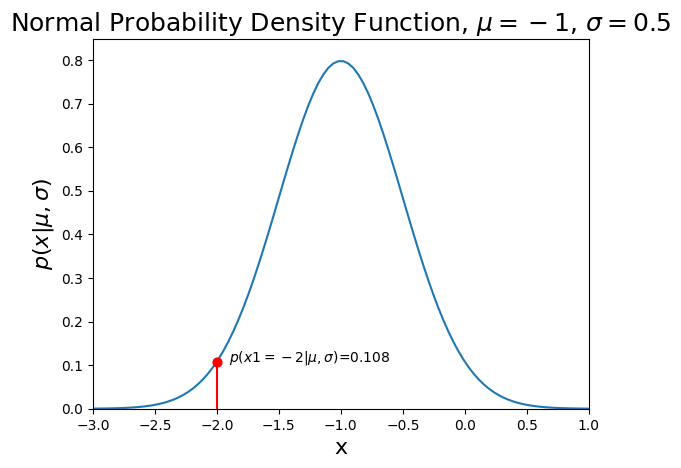

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plots normal distribution and highlights specific value x1
def plot_normal(mu: float=0.0, sigma: float=1.0, x1: float=None):
    # points along x and y axis
    x = np.linspace(-4*sigma+mu, 4*sigma+mu, 100)
    y = [g(point, mu=mu, sigma=sigma) for point in x]
    plt.plot(x,y)

    # plots passed specific value
    if x1 is not None:
        # line from x-axis to curve
        plt.plot([x1, x1], [0, g(x1, mu=mu, sigma=sigma)], 'r')
        # single point on curve
        plt.scatter(x1, g(x1, mu=mu, sigma=sigma), s=40, c='r', zorder=10)
    
    # formating of point label
    pad = 0.1
    plt.annotate(f"$p(x1={x1}|\mu,\sigma)$={round(g(x1, mu=mu, sigma=sigma),3)}", (x1+pad, g(x1, mu=mu, sigma=sigma)))

    # axes labels and title formatting
    plt.margins(y=0)
    plt.margins(x=0)
    plt.ylim([0,g(mu,mu=mu,sigma=sigma)+0.05])
    plt.xlabel("x", fontsize=16)
    plt.ylabel("$p(x|\\mu,\\sigma)$", fontsize=16)
    plt.title(f"Normal Probability Density Function, $\\mu={mu}$, $\\sigma={sigma}$", fontsize=18)
    plt.show()

plot_normal(mu=-1, sigma=0.5, x1=-2)